## Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import os
import warnings

# set the max columns to none
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read and set directory for dataset for any OS
os.chdir('/Users/home/Library/CloudStorage/OneDrive-UniversityofKansas/RUDRO/Study Documents/FALL-23/Advanced Data Science/Final Project/Crimson-Insights-A-Comprehensive-Analysis-of-Crime-Dynamics-in-the-Heartland-KS/Datasets')

In [3]:
df = pd.read_csv('merged_kansas_state_2007_2020.csv')

In [4]:
df_ks = pd.read_csv('data_kansas_EDA.csv')

In [5]:
df.shape

(90, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   Type        90 non-null     object 
 2   2007        90 non-null     float64
 3   2008        90 non-null     float64
 4   2009        90 non-null     float64
 5   2010        90 non-null     float64
 6   2011        90 non-null     float64
 7   2012        90 non-null     float64
 8   2013        90 non-null     float64
 9   2014        90 non-null     float64
 10  2015        90 non-null     float64
 11  2016        90 non-null     float64
 12  2017        90 non-null     float64
 13  2018        90 non-null     float64
 14  2019        90 non-null     float64
 15  2020        90 non-null     float64
 16  City name   90 non-null     object 
 17  Latitude    90 non-null     float64
 18  Longitude   90 non-null     float64
dtypes: float64(16), int64(1), objec

In [7]:
# dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# checking for null values
df.isnull().sum()

Type         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
City name    0
Latitude     0
Longitude    0
dtype: int64

In [9]:
# checking for duplicate rows
df.duplicated().sum()

0

In [10]:
df_ks.shape

(336228, 31)

In [11]:
df_ks.drop(columns=['Unnamed: 0','ARRESTEE_ID', 'INCIDENT_ID', 'SUBMISSION_DATE', 'ARREST_DATE', 'ARREST_TYPE_ID', 'OFFENSE_TYPE_ID', 'OFFENDER_ID', 'OFFENSE_ID', 'VICTIM_ID', 'AGE_ID_VICT','VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID', 'TIME_FOR_ARREST', 'NUMBER_OF_DAYS'], axis=1, inplace=True)
df_ks.columns

Index(['DATA_YEAR', 'AGE_ID', 'AGE_NUM', 'SEX_CODE', 'RACE_ID', 'ETHNICITY_ID',
       'WEAPON_ID', 'INCIDENT_DATE', 'INCIDENT_HOUR', 'LOCATION_ID',
       'AGE_NUM_VICT', 'SEX_CODE_VICT', 'RACE_ID_VICT', 'ETHNICITY_ID_VICT',
       'DAY_OF_WEEK', 'CRIME_AGAINST'],
      dtype='object')

In [12]:
# Alternatively, you can use a loop to convert all 'object' columns
for column in df_ks.select_dtypes(include='object').columns:
    df_ks[column] = df_ks[column].astype('category')

In [13]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336228 entries, 0 to 336227
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   DATA_YEAR          336228 non-null  int64   
 1   AGE_ID             336228 non-null  category
 2   AGE_NUM            336227 non-null  float64 
 3   SEX_CODE           336228 non-null  category
 4   RACE_ID            336228 non-null  category
 5   ETHNICITY_ID       336228 non-null  category
 6   WEAPON_ID          336228 non-null  category
 7   INCIDENT_DATE      336228 non-null  category
 8   INCIDENT_HOUR      336228 non-null  category
 9   LOCATION_ID        336228 non-null  category
 10  AGE_NUM_VICT       130316 non-null  float64 
 11  SEX_CODE_VICT      137845 non-null  category
 12  RACE_ID_VICT       137845 non-null  category
 13  ETHNICITY_ID_VICT  137313 non-null  category
 14  DAY_OF_WEEK        336228 non-null  category
 15  CRIME_AGAINST      326447 non-null

In [14]:
df_ks['AGE_NUM_VICT'].value_counts()

19.0    4342
20.0    4138
21.0    3742
22.0    3618
25.0    3537
        ... 
93.0      30
96.0      27
91.0      25
92.0      18
97.0       4
Name: AGE_NUM_VICT, Length: 97, dtype: int64

In [15]:
# check for invalid values or inf values
df_ks['AGE_NUM_VICT'].value_counts(dropna=False)

NaN     205912
19.0      4342
20.0      4138
21.0      3742
22.0      3618
         ...  
93.0        30
96.0        27
91.0        25
92.0        18
97.0         4
Name: AGE_NUM_VICT, Length: 98, dtype: int64

In [16]:
df_ks.rename(columns={'DATA_YEAR': 'Year'}, inplace=True)

In [17]:
# checking for null values
df_ks.isnull().sum()

Year                      0
AGE_ID                    0
AGE_NUM                   1
SEX_CODE                  0
RACE_ID                   0
ETHNICITY_ID              0
WEAPON_ID                 0
INCIDENT_DATE             0
INCIDENT_HOUR             0
LOCATION_ID               0
AGE_NUM_VICT         205912
SEX_CODE_VICT        198383
RACE_ID_VICT         198383
ETHNICITY_ID_VICT    198915
DAY_OF_WEEK               0
CRIME_AGAINST          9781
dtype: int64

In [18]:
df_ks['AGE_NUM_VICT'].value_counts()

# fill the null values with the mean
df_ks['AGE_NUM_VICT'].fillna(df_ks['AGE_NUM_VICT'].mean(), inplace=True)

In [19]:
df_ks['SEX_CODE_VICT'].fillna(df_ks['SEX_CODE_VICT'].mode()[0], inplace=True)

In [20]:
df_ks['CRIME_AGAINST']

0         Property
1         Property
2         Property
3         Property
4         Property
            ...   
336223     Society
336224     Society
336225     Society
336226     Society
336227     Society
Name: CRIME_AGAINST, Length: 336228, dtype: category
Categories (3, object): ['Person', 'Property', 'Society']

In [21]:
df_ks['CRIME_AGAINST'].fillna(df_ks['CRIME_AGAINST'].mode()[0], inplace=True)

## Data transformation

In [22]:
# change the year columns to one single year column using wide to long
df = pd.melt(df, id_vars=['Type', 'City name', 'Latitude', 'Longitude'], value_vars=['2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020'], var_name='Year')

In [23]:
df.head()

,Type,City name,Latitude,Longitude,Year,value
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0


In [24]:
# rename the value column in df to Count of Types
df.rename(columns={'value':'Count of Types'}, inplace=True)

df.head()

,Type,City name,Latitude,Longitude,Year,Count of Types
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0


In [25]:
# Identify rows where 'Type' contains 'Crime Index'
crime_index_rows = df['Type'].str.contains('Crime Index')

# Create a new DataFrame for 'Crime Index' rows
crime_index_df = df[crime_index_rows]

crime_index_df.head()


,Type,City name,Latitude,Longitude,Year,Count of Types
8,Crime Index,Hutchinson,38.060844,-97.929771,2007,420.0
17,Crime Index,Kansas,39.106667,-94.676392,2007,632.4
26,Crime Index,Lawrence,38.960213,-95.277390,2007,381.8
35,Crime Index,Lenexa,38.953600,94.733600,2007,199.6
44,Crime Index,Olathe,38.881400,94.819100,2007,247.4


In [26]:
# drop the row where 'Type' contains 'Crime Index' value
# create a Boolean mask for the rows to remove
mask = df['Type'] == 'Crime Index'

# select all rows except the ones that contain 'Coca Cola'
df = df[~mask]

In [27]:
# drop the latitude and longitude columns as they are not needed
crime_index_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

crime_index_df.head()

,Type,City name,Year,Count of Types
8,Crime Index,Hutchinson,2007,420.0
17,Crime Index,Kansas,2007,632.4
26,Crime Index,Lawrence,2007,381.8
35,Crime Index,Lenexa,2007,199.6
44,Crime Index,Olathe,2007,247.4


In [28]:
# rename the value column in crime_index_df to Value of CI
# rename the Type column to Crime Index
crime_index_df.rename(columns={'Count of Types':'Value of CI', 'Type':'Crime Index'}, inplace=True)

crime_index_df.head()


,Crime Index,City name,Year,Value of CI
8,Crime Index,Hutchinson,2007,420.0
17,Crime Index,Kansas,2007,632.4
26,Crime Index,Lawrence,2007,381.8
35,Crime Index,Lenexa,2007,199.6
44,Crime Index,Olathe,2007,247.4


In [29]:
# drop the rows Crime Index, and rename the value column to crime index
crime_index_df.drop('Crime Index', axis=1, inplace=True)

crime_index_df.rename(columns={'Value of CI':'Crime Index'}, inplace=True)

crime_index_df.head()

,City name,Year,Crime Index
8,Hutchinson,2007,420.0
17,Kansas,2007,632.4
26,Lawrence,2007,381.8
35,Lenexa,2007,199.6
44,Olathe,2007,247.4


In [30]:
# join the crime_index_df with df on the right side of the df dataframe, creating a new dataframe called df_new
df_new = pd.merge(df, crime_index_df, how='left', on=['City name', 'Year'])

df_new.head()


,Type,City name,Latitude,Longitude,Year,Count of Types,Crime Index
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0,420.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0,420.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0,420.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0,420.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0,420.0


In [31]:
df_new.shape

(1120, 7)

In [32]:
df_new.isna().sum()

Type              0
City name         0
Latitude          0
Longitude         0
Year              0
Count of Types    0
Crime Index       0
dtype: int64

In [33]:
df_new.info()

# change the Year column to int32
df_new['Year'] = df_new['Year'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            1120 non-null   object 
 1   City name       1120 non-null   object 
 2   Latitude        1120 non-null   float64
 3   Longitude       1120 non-null   float64
 4   Year            1120 non-null   object 
 5   Count of Types  1120 non-null   float64
 6   Crime Index     1120 non-null   float64
dtypes: float64(4), object(3)
memory usage: 70.0+ KB


In [34]:
df_ks.shape, df_new.shape

((336228, 16), (1120, 7))

In [35]:
df_ks.info()

# change the Year column to datetime
df_ks['Year'] = df_ks['Year'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336228 entries, 0 to 336227
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               336228 non-null  int64   
 1   AGE_ID             336228 non-null  category
 2   AGE_NUM            336227 non-null  float64 
 3   SEX_CODE           336228 non-null  category
 4   RACE_ID            336228 non-null  category
 5   ETHNICITY_ID       336228 non-null  category
 6   WEAPON_ID          336228 non-null  category
 7   INCIDENT_DATE      336228 non-null  category
 8   INCIDENT_HOUR      336228 non-null  category
 9   LOCATION_ID        336228 non-null  category
 10  AGE_NUM_VICT       336228 non-null  float64 
 11  SEX_CODE_VICT      336228 non-null  category
 12  RACE_ID_VICT       137845 non-null  category
 13  ETHNICITY_ID_VICT  137313 non-null  category
 14  DAY_OF_WEEK        336228 non-null  category
 15  CRIME_AGAINST      336228 non-null

In [36]:
df_new['Year'] = df_new['Year'].astype('int64')

In [37]:
# drop incident_date from df_ks
df_ks.drop('INCIDENT_DATE', axis=1, inplace=True)

## EDA

In [38]:
# drop duplicate rows from df_new
df_new.drop_duplicates(inplace=True)

In [39]:
# # drop duplicate rows from df_ks
df_ks.drop_duplicates(inplace=True)

df_ks.shape, df_new.shape


((117755, 15), (1120, 7))

In [40]:
df_new.isna().sum()

Type              0
City name         0
Latitude          0
Longitude         0
Year              0
Count of Types    0
Crime Index       0
dtype: int64

In [41]:
df_ks.isna().sum()

Year                     0
AGE_ID                   0
AGE_NUM                  1
SEX_CODE                 0
RACE_ID                  0
ETHNICITY_ID             0
WEAPON_ID                0
INCIDENT_HOUR            0
LOCATION_ID              0
AGE_NUM_VICT             0
SEX_CODE_VICT            0
RACE_ID_VICT         72606
ETHNICITY_ID_VICT    72775
DAY_OF_WEEK              0
CRIME_AGAINST            0
dtype: int64

In [42]:
# fill the missing values in df_ks with mode
df_ks['RACE_ID_VICT'].fillna(df_ks['RACE_ID_VICT'].mode()[0], inplace=True)
df_ks['ETHNICITY_ID_VICT'].fillna(df_ks['ETHNICITY_ID_VICT'].mode()[0], inplace=True)


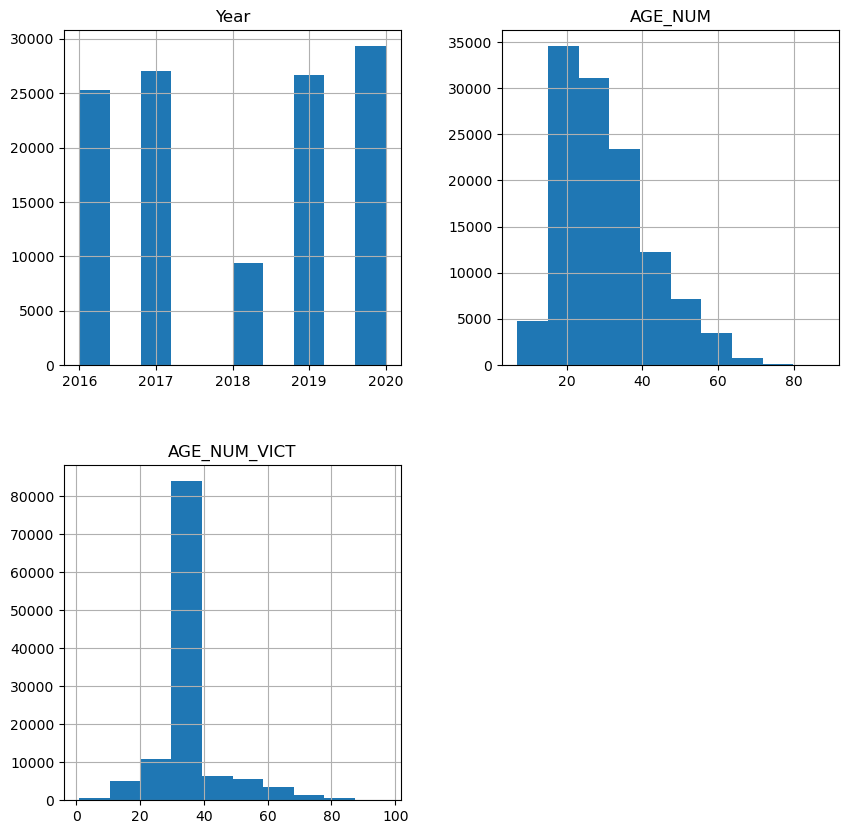

In [43]:
# draw histogram for df_ks
df_ks.hist(figsize=(10,10))
plt.show()

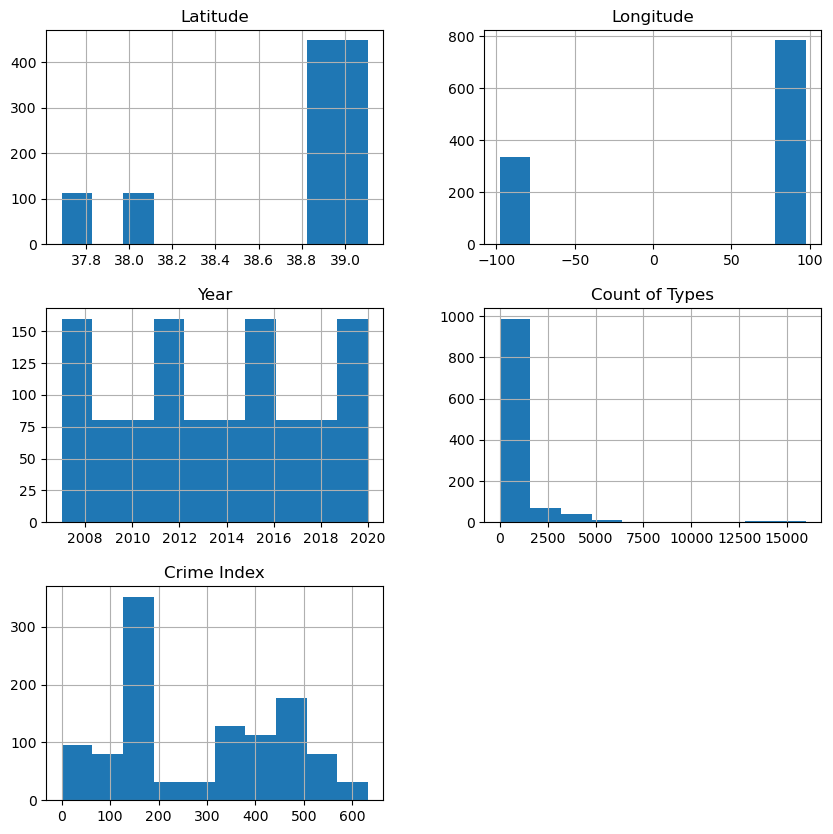

In [44]:
# draw histogram for df_ks
df_new.hist(figsize=(10,10))
plt.show()

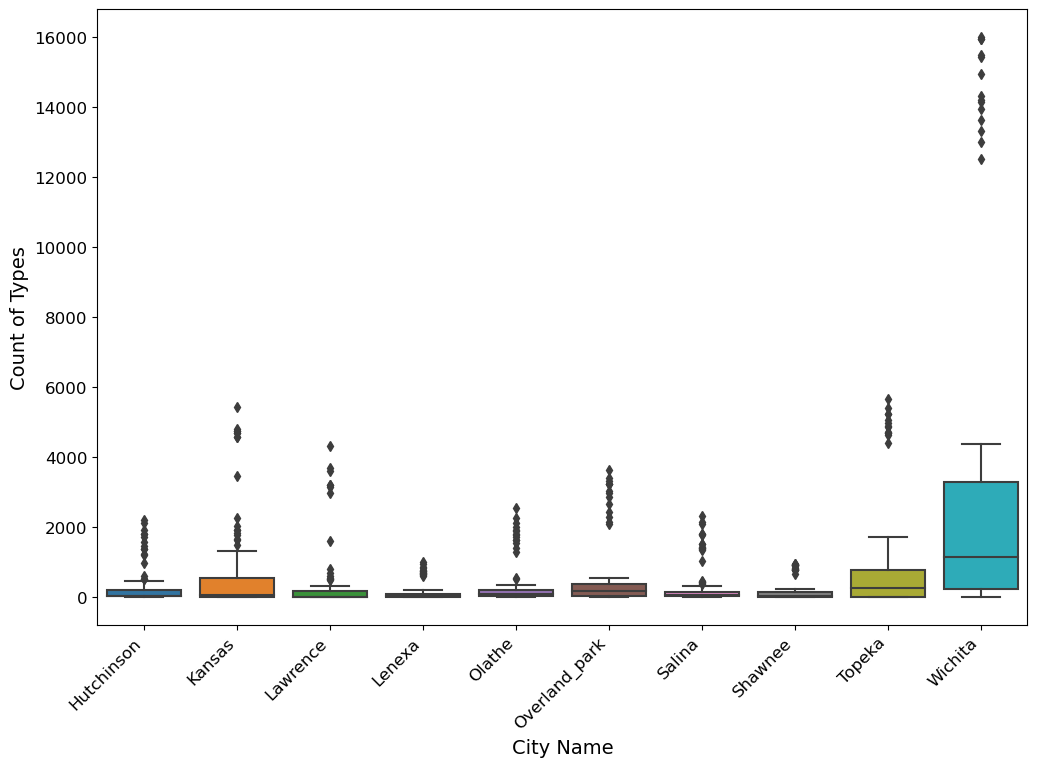

In [58]:
# Set the plot size and create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_new, x="City name", y="Count of Types")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set larger font size for x-axis and y-axis labels
plt.xlabel("City Name", fontsize=14)
plt.ylabel("Count of Types", fontsize=14)

# Set larger font size for x-axis tick labels
plt.xticks(fontsize=12)

# Set larger font size for y-axis tick labels
plt.yticks(fontsize=12)

# Show the plot
plt.show()


How does the overall crime rate change over time? Are there any noticeable patterns or trends in monthly, seasonal, or yearly crime rates?

In [45]:
df_new['Type'].value_counts()

Murders        140
Rapes          140
Robberies      140
Assaults       140
Burglaries     140
Thefts         140
Auto thefts    140
Arson          140
Name: Type, dtype: int64

In [46]:
# Group by 'Year' and aggregate the total crime index for each year
df_aggregated = df_new.groupby('Year')['Crime Index'].sum().reset_index()

# Create the time series line plot for total crime index
fig = px.line(df_aggregated, x='Year', y='Crime Index', 
              title='Time Series Graph for Year and Total Crime Index')

# Adjust the y-axis ticks if needed
fig.update_yaxes(tick0=0, dtick=3000)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

What is the total crime type over the years?

In [47]:
# Group by 'Type' and calculate the total count for each crime type
df_total_counts = df_new.groupby('Type')['Count of Types'].sum().reset_index()

# Create a bar plot for the total count of each crime type with a logarithmic y-axis
fig = px.bar(df_total_counts, x='Type', y='Count of Types',color='Type',
             title='Total Count of Crime Types (Log Scale) from 2007 to 2020',
             labels={'Count of Types': 'Total Count'},
             height=500, width=800)

# Use a logarithmic scale for the y-axis
fig.update_yaxes(type='log')

# Remove the background grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

Top 3 crime over the years

In [48]:
# Group by 'Year' and 'Type' and aggregate the count of Types for each year and type
df_aggregated = df_new.groupby(['Year', 'Type'])['Count of Types'].sum().reset_index()

# Calculate the total count for each crime type
df_total_counts = df_aggregated.groupby('Type')['Count of Types'].sum().reset_index()

# Find the top 3 crime types
top_3_types = df_total_counts.nlargest(3, 'Count of Types')['Type'].tolist()

# Filter the original DataFrame for the top 3 crime types
df_top_3 = df_aggregated[df_aggregated['Type'].isin(top_3_types)]

# Create a line plot for the top 3 crime types with years on the x-axis
fig = px.line(df_top_3, x='Year', y='Count of Types', color='Type',
              title='Trend of Top 3 Crime Types Over the Years',
              labels={'Count of Types': 'Total Count'},
              height=500, width=800)

# Normalize the y-axis
fig.update_yaxes(matches='y')

# Remove the background grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

City name and Count of the crimes

In [49]:
df_new.head()

,Type,City name,Latitude,Longitude,Year,Count of Types,Crime Index
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0,420.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0,420.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0,420.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0,420.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0,420.0


In [56]:
# Group by 'City name' and calculate the total crime index for each city
df_aggregated = df_new.groupby('City name')['Crime Index'].sum().reset_index()

# Create a bar plot for the total crime index of each city
fig = px.bar(df_aggregated, x='City name', y='Crime Index',
             title='Total Crime Index by City',
             labels={'City name': 'City Name', 'Crime Index': 'Total Crime Index'},
             color='City name',
             height=500, width=800)

# Remove the background grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

Days of the crime 

In [61]:
df_ks['DAY_OF_WEEK'].value_counts()

Sat     18372
Fri     17926
Thue    17322
Wed     16463
Sun     16345
Tue     15988
Mon     15339
Name: DAY_OF_WEEK, dtype: int64

In [69]:
# change spelling of the days of the week
# in place = True will change the values in the dataframe

df_ks['DAY_OF_WEEK'] = df_ks['DAY_OF_WEEK'].replace({'Thue': 'Thurs'})

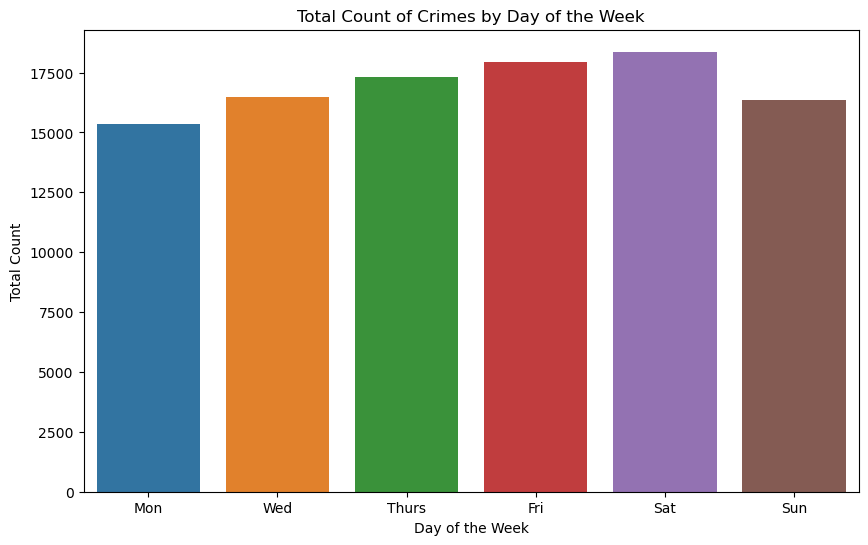

In [71]:
# visualize the day of the week with crime occurrence
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='DAY_OF_WEEK', data=df_ks, order=['Mon','Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

# Set the y-axis label
plt.ylabel('Total Count')

plt.xlabel('Day of the Week')

# Set the plot title
plt.title('Total Count of Crimes by Day of the Week')

# Show the plot
plt.show()

What is the Sex of the offenders involved in crimes?

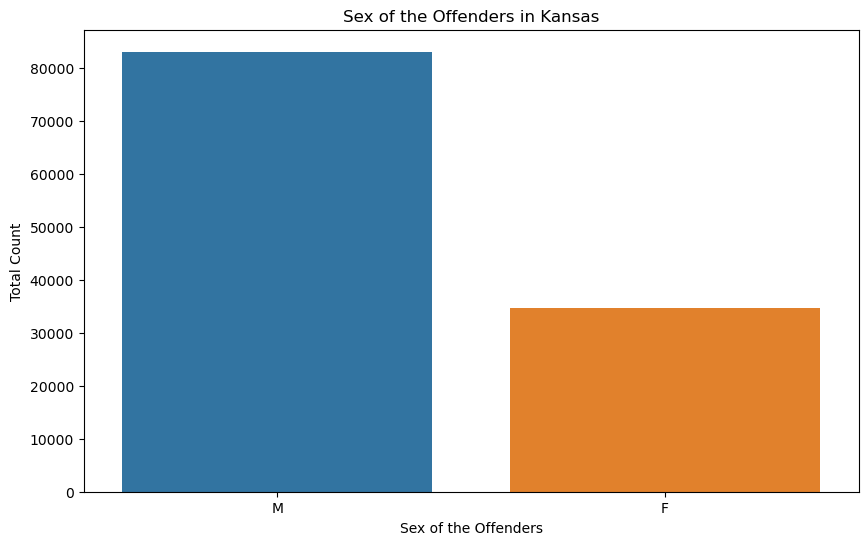

In [72]:
# visualizing the sex code of the offenders
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='SEX_CODE', data=df_ks, order=['M','F'])

# Set the y-axis label
plt.ylabel('Total Count')

plt.xlabel('Sex of the Offenders')

# Set the plot title
plt.title('Sex of the Offenders in Kansas')

# Show the plot
plt.show()

What is the race and ethnicity of offenders?

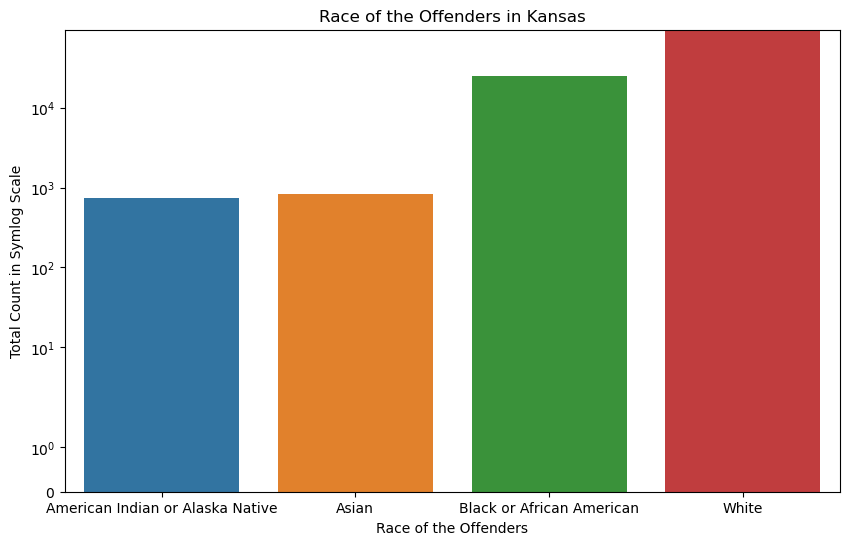

In [80]:
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='RACE_ID', data=df_ks)

# Set the y-axis label
plt.ylabel('Total Count in Symlog Scale')
# log scale for the y-axis
plt.yscale('symlog')
plt.xlabel('Race of the Offenders')

# Set the plot title
plt.title('Race of the Offenders in Kansas')

# Show the plot
plt.show()